# Assignment 1C - Question 2
## Semantic Person Search

In [1]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
import keras
from keras import layers


import os
import datetime
import numpy

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.preprocessing.image import Iterator

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#import pydot
import IPython
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model
import imageio
import cv2

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
train = pd.read_csv('CAB420_Assessment_1C_Data/Data/Q2/Q2/Train_Data/Train.csv')
test = pd.read_csv('CAB420_Assessment_1C_Data/Data/Q2/Q2/Test_Data/Test.csv')

In [3]:
train_img = []
gnd = []
files = glob.glob('CAB420_Assessment_1C_Data/Data/Q2/Q2/Train_Data/Originals/*.png')
for myfile in files:
    im = keras.preprocessing.image.load_img(myfile)
    image = keras.preprocessing.image.img_to_array(im)
    gnd.append(myfile[58:])
    image = image[0:50,0:50]
    train_img.append(image)

    
train_img = np.array(train_img)
train_img = train_img.astype('float32') / 255.



In [4]:
print(train_img[0])

[[[0.27450982 0.2784314  0.24705882]
  [0.27450982 0.2784314  0.24705882]
  [0.27450982 0.2784314  0.24705882]
  ...
  [0.28627452 0.29411766 0.24313726]
  [0.2901961  0.29411766 0.23921569]
  [0.2901961  0.29411766 0.23921569]]

 [[0.2784314  0.28235295 0.2509804 ]
  [0.2784314  0.28235295 0.2509804 ]
  [0.2784314  0.28235295 0.2509804 ]
  ...
  [0.28627452 0.29411766 0.24313726]
  [0.2901961  0.29411766 0.23921569]
  [0.2901961  0.29411766 0.23921569]]

 [[0.2784314  0.28235295 0.2509804 ]
  [0.2784314  0.28235295 0.2509804 ]
  [0.2784314  0.28235295 0.2509804 ]
  ...
  [0.28627452 0.29411766 0.24313726]
  [0.2901961  0.29411766 0.23921569]
  [0.2901961  0.29411766 0.23921569]]

 ...

 [[0.3137255  0.3019608  0.27450982]
  [0.30980393 0.29803923 0.27058825]
  [0.29803923 0.28627452 0.25882354]
  ...
  [0.4509804  0.28235295 0.24705882]
  [0.46666667 0.28235295 0.24313726]
  [0.4745098  0.28627452 0.23921569]]

 [[0.3137255  0.3019608  0.27450982]
  [0.30980393 0.29803923 0.27058825]


In [5]:
test_img = []
test_gnd = []
files = glob.glob('CAB420_Assessment_1C_Data/Data/Q2/Q2/Test_Data/Originals/*.png')
for myfile in files:
    im = keras.preprocessing.image.load_img(myfile)
    image = keras.preprocessing.image.img_to_array(im)
    test_gnd.append(myfile[58:])
    image = image[0:50,0:50]
    test_img.append(image)

    
test_img = np.array(test_img)
test_img = test_img.astype('float32') / 255.


In [6]:
train = train.drop(columns=['torcol2','torcol3','tortex','torcol3','legcol2','legcol3','legtex','pose'])


train_gender = train.iloc[:,1]
train_gender = np.asarray(train_gender)
train_tortyp = train.iloc[:,2]
train_tortyp = np.asarray(train_tortyp)
train_torcol = train.iloc[:,3]
train_torcol = np.asarray(train_torcol)
train_legtyp = train.iloc[:,4]
train_legtyp = np.asarray(train_legtyp)
train_legcol = train.iloc[:,5]
train_legcol = np.asarray(train_legcol)
train_luggage = train.iloc[:,6] 
train_luggage = np.asarray(train_luggage)


In [7]:
test = test.drop(columns=['torcol2','torcol3','tortex','torcol3','legcol2','legcol3','legtex','pose'])

test_gender = test.iloc[:,1]
test_gender = np.asarray(test_gender)
test_tortyp = test.iloc[:,2]
test_tortyp = np.asarray(test_tortyp)
test_torcol = test.iloc[:,3]
test_torcol = np.asarray(test_torcol)
test_legtyp = test.iloc[:,4]
test_legtyp = np.asarray(test_legtyp)
test_legcol = test.iloc[:,5]
test_legcol = np.asarray(test_legcol)
test_luggage = test.iloc[:,6] 
test_luggage = np.asarray(test_luggage)

In [8]:
#fig = plt.figure(figsize=[20, 20])
#for i in range(100):
#    ax = fig.add_subplot(10, 10, i + 1)
#    ax.imshow(test_originals[i])

In [9]:
#,tortyp,torcol,legtyp,legcol,luggage]
#, train_tortyp,train_torcol,train_legtyp,train_legcol,train_luggage]
#, test_tortyp, test_torcol, test_legtyp, test_legcol, test_luggage]

In [10]:
inputs = keras.Input(shape=(50, 50, 3, ), name='img')
x = layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = layers.Flatten()(x)
x1 = layers.Dense(64, activation='relu')(x)
gender = layers.Dense(3, name='gender_out')(x1)

x2 = layers.Dense(64, activation='relu')(x)
tortyp = layers.Dense(3, name='tortyp_out')(x2)

x3 = layers.Dense(64, activation='relu')(x)
torcol = layers.Dense(11, name='torcol_out')(x3)

x4 = layers.Dense(64, activation='relu')(x)
legtyp = layers.Dense(3, name='legtyp_out')(x4)

x5 = layers.Dense(64, activation='relu')(x)
legcol = layers.Dense(11, name='legocol_out')(x5)

x6 = layers.Dense(64, activation='relu')(x)
luggage = layers.Dense(3, name='luggage_out')(x6)

model_cnn = keras.Model(inputs=inputs, outputs=[gender, tortyp, torcol, legtyp, legcol, luggage], name='A1CQ2')


# inputs = keras.Input(shape=(50, 50, 3, ), name='img')
# x = layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(inputs)
# x = layers.MaxPool2D(pool_size=(2, 2))(x)
# x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(x)
# x = layers.MaxPool2D(pool_size=(2, 2))(x)
# x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
# x = layers.Flatten()(x)
# x = layers.Dense(64, activation='relu')(x)
# outputs = layers.Dense(11, activation='softmax')(x)

# model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='SVHN_CNN_Model')


model_cnn.summary()

Model: "A1CQ2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 8)    224         img[0][0]                        
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 24, 24, 8)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 22, 22, 16)   1168        max_pooling2d[0][0]              
______________________________________________________________________________________________

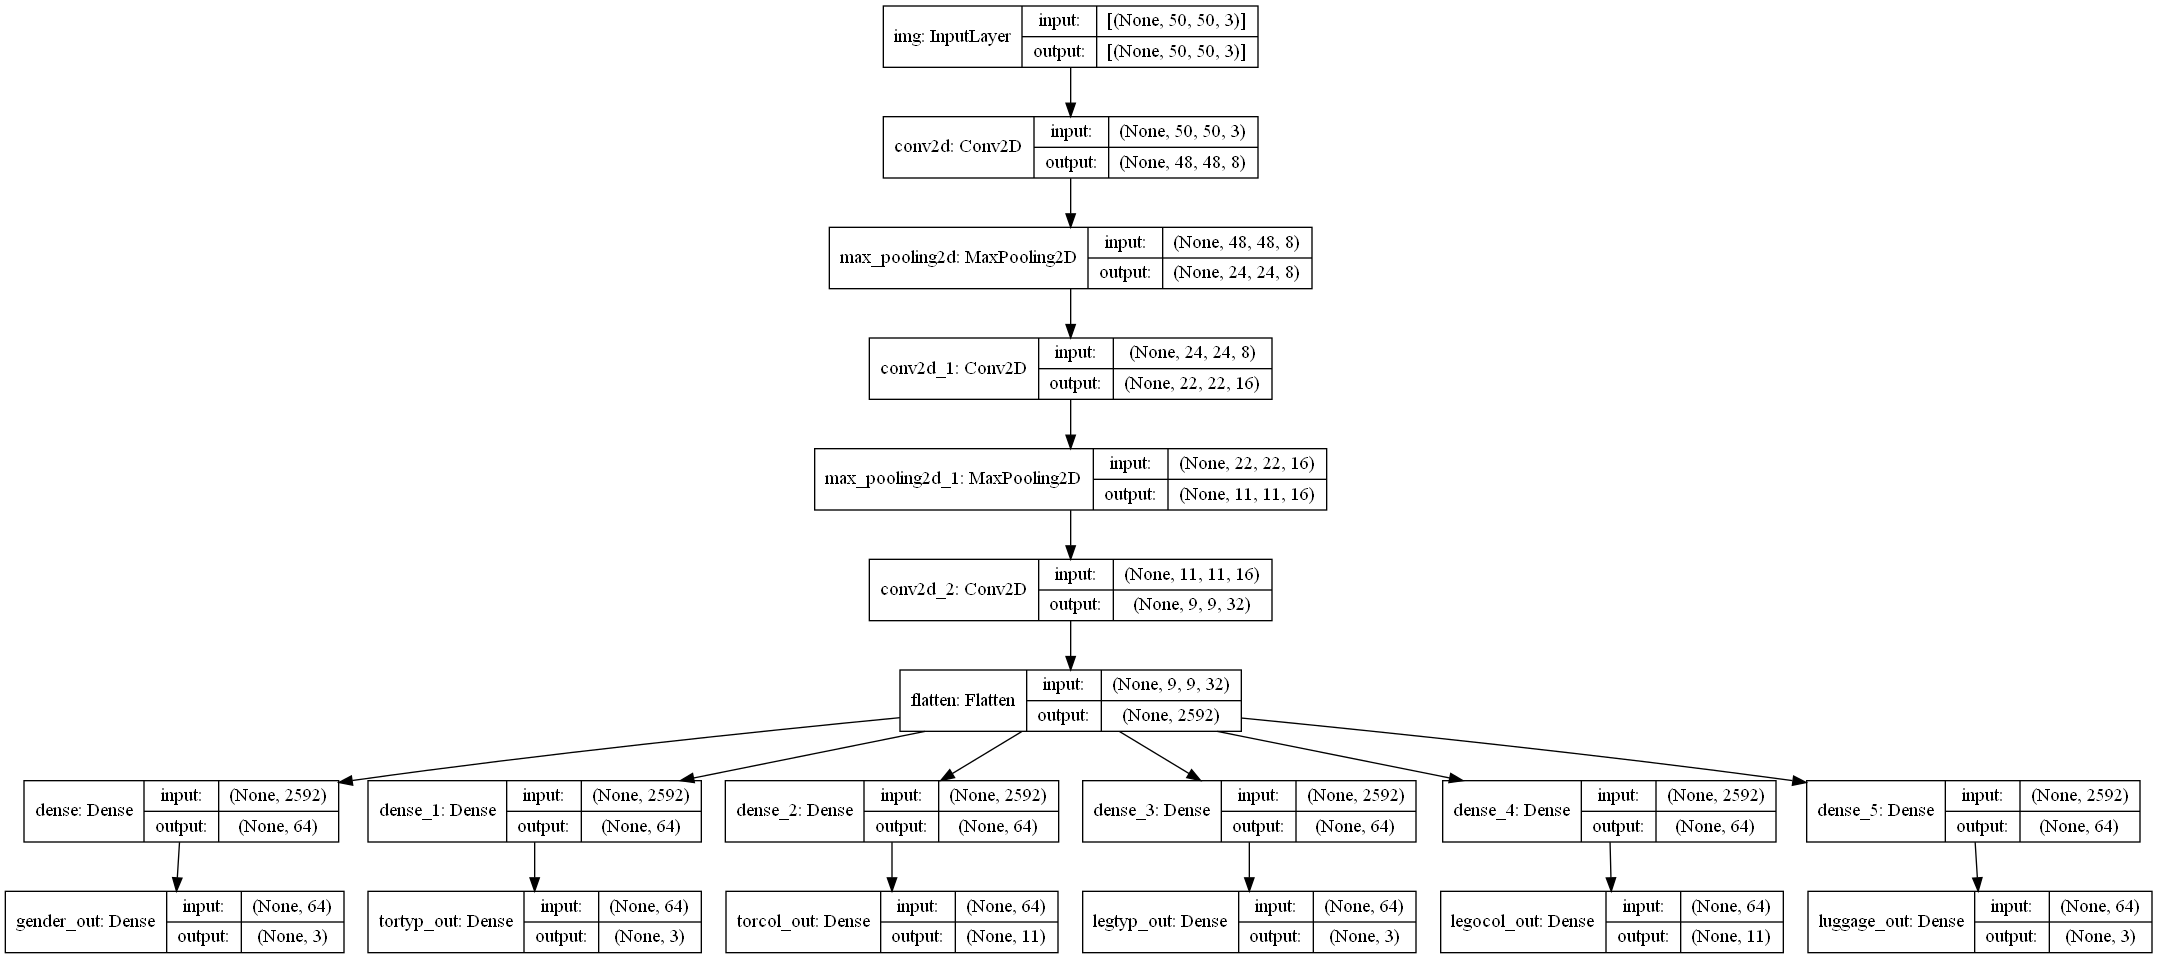

In [11]:
plot_model(model_cnn, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model.png')

In [12]:
model_cnn.compile(loss=['mean_squared_error', keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
              optimizer=keras.optimizers.RMSprop())

In [13]:
history = model_cnn.fit(train_img, [train_gender, train_tortyp, train_torcol, train_legtyp, train_legcol, train_luggage],
                    batch_size=64,
                    epochs=20,
                    validation_data=(test_img, [test_gender, test_tortyp, test_torcol, test_legtyp, test_legcol, test_luggage]))

Epoch 1/20
9/9 [==============================] - 3s 67ms/step - loss: 1.4190 - gender_out_loss: 0.4625 - tortyp_out_loss: 0.9565 - val_loss: 1.1923 - val_gender_out_loss: 0.3549 - val_tortyp_out_loss: 0.8374
Epoch 2/20
9/9 [==============================] - 0s 18ms/step - loss: 1.0392 - gender_out_loss: 0.2758 - tortyp_out_loss: 0.7634 - val_loss: 1.1600 - val_gender_out_loss: 0.4274 - val_tortyp_out_loss: 0.7326
Epoch 3/20
9/9 [==============================] - 0s 17ms/step - loss: 1.0270 - gender_out_loss: 0.3168 - tortyp_out_loss: 0.7101 - val_loss: 1.0258 - val_gender_out_loss: 0.3491 - val_tortyp_out_loss: 0.6767
Epoch 4/20
9/9 [==============================] - 0s 16ms/step - loss: 0.9595 - gender_out_loss: 0.2638 - tortyp_out_loss: 0.6957 - val_loss: 1.2954 - val_gender_out_loss: 0.4115 - val_tortyp_out_loss: 0.8839
Epoch 5/20
9/9 [==============================] - 0s 16ms/step - loss: 1.0174 - gender_out_loss: 0.2835 - tortyp_out_loss: 0.7339 - val_loss: 1.1273 - val_gender_ou